In [1]:
import numpy as np
import math
import sys
import statistics
import csv
import matplotlib.pyplot as plt


Ground Truth

In [2]:
gt = {}
benchmarks = ["pi", "GPA", "tug_of_war", "altermu2", "normal_mixture", "spacex", "zeroone", "weekend", "conjugate_gaussians"]

gt["pi"] = (5 - math.pi)/4
gt["GPA"] = 0.6115107913669064
gt["tug_of_war"] = 0.5
gt["altermu2"] = 0.1550617483
gt["normal_mixture"] = {"theta": 12/42, "mu1": -9.702359975571609, "mu2": 9.657948191704119}
gt["spacex"] = 30.00463476991299
gt["zeroone"] = {"w1": 0.0565823032448, "w2": 3.68882559517}
gt["weekend"] = 0.3742061754266954
gt["conjugate_gaussians"] = 1.0
gt["coinBias"] = 5/12
gt["addFun_sum"] = 0.0
gt["clickGraph"] = 0.614154185582757
gt["addFun_max"] = 1/math.sqrt(math.pi)
gt["clinicalTrial2"] = 2/7
gt["clinicalTrial1"] = 1 - 78460907384924307566949191554862076141244676160/94572409612368043294199619316675018741649913883
gt["trueskill"] = 0.5



Functions

In [29]:
def stan_accuracy(benchmark_name, var_name, gt):
    file_name = "/space/poorvagarg/cmdstan-2.28.2/benchmarks/" + benchmark_name + "/results.txt"
    file_handle = open(file_name, "r")
    lines = file_handle.readlines()

    answer = 0
    for i in lines:
        current = i.split()
        # print(current)
        if current != []:
            if current[0] == var_name:
                answer = float(current[1])
    handle2 = open("stan_results.txt", "a")
    handle2.writelines(benchmark_name + "," + var_name + "," + str(abs(gt - answer)) + "\n")
    handle2.close()
    return abs(gt - answer)

def AQUA_accuracy(benchmark_name, result_file, gt):
    file_handle = open(result_file, "r")
    lines = file_handle.readlines()

    min_error = 10000000    
    for i in lines:
        cur = float(i[:-1])
        if abs(gt - cur) < min_error:
            min_error = abs(gt - cur)
    return min_error

def Dice_accuracy(benchmark_name, result_file, gt, position, flag):
    file_handle = open(result_file, "r")
    lines = file_handle.readlines()
    
    min_error = 100000000
    min_line = ""
    for i in lines:
        cur = float(i.split(",")[position])
        # if float(i.split(",")[1]) <= 8.0:
            # continue
        if (flag == None):
            if abs(gt - cur) <= min_error:
                min_error = abs(gt - cur)
                min_line=i
        elif (float(i.split(",")[flag[1]]) == flag[0]):
            if abs(gt - cur) <= min_error:
                min_error = abs(gt - cur)
                min_line = i
        else:
            continue
    print(min_line)
    return min_error

def WebPPL_accuracy(benchmark, method, gt, upperlimit, suffix=""):
    min_error = 1000000000
    a = 0
    # for number in range(16, 17):
    for number in range(1,upperlimit+1):
    # for number in range(24, 25):
        ans = []
        file_handle = open("/space/poorvagarg/webppl_benchmarks/" + benchmark + "/output" + suffix + "_" + method + "_" + str(number) + ".txt", "r")
        lines = file_handle.readlines()
        # lines = lines[0:10]
        for i in lines:
            # print(i)
            if i.split() == []:
                continue
            if i.split()[0] == "{":
                # print(float(i.split()[2][:-1]))
                ans.append(abs(float(i.split()[2][:-1]) - gt))
            else:
                continue
        if ans == []:
            # print(number)
            continue
        
        cur = statistics.mean(ans)
        # print(statistics.mean(ans), statistics.stdev(ans))
        # print(cur, gt)
        if (cur < min_error):
            a = number
            min_error = cur
    print(number)
    return min_error

def write_csv(data):
    with open("/space/poorvagarg/.julia/dev/Dice/benchmarks/results.csv", "w") as file:
        writer = csv.writer(file)
        writer.writerow(data)









Pi

In [32]:
aqua_res = "Not supported"
dice_res = Dice_accuracy("pi", "/space/poorvagarg/.julia/dev/Dice/benchmarks/pi/results2.txt", gt["pi"], 1, None)
webppl_rej_res = WebPPL_accuracy("pi", "rejection", gt["pi"], 40)
webppl_mcmc_res = WebPPL_accuracy("pi", "MCMC", gt["pi"], 40)
psi_res = "remaining integrals"
stan_res = stan_accuracy("pi", "answer", 1 - gt["pi"])

stan_res

write_csv(["pi", aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, psi_res])
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, stan_res

11.0,0.46439886093139654,40016.864683158

40
40


('Not supported',
 0.00020297567115518111,
 6.192902750292716e-05,
 8.544762942452877e-05,
 1.926660255169299e-05)

GPA

In [36]:
aqua_res = AQUA_accuracy("GPA", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/GPA/results.txt", gt["GPA"])
dice_res = Dice_accuracy("GPA", "/space/poorvagarg/.julia/dev/Dice/benchmarks/GPA/results.txt", gt["GPA"], 2, None)
webppl_rej_res = WebPPL_accuracy("GPA", "rejection", gt["GPA"], 12)
webppl_mcmc_res = WebPPL_accuracy("GPA", "MCMC", gt["GPA"], 16)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

20.0,4096.0,0.6115107913669062,197.59037813

12
16


(0.3615107913668967,
 2.220446049250313e-16,
 0.008111791816546777,
 0.004794355433621856)

Tug of War

In [43]:
aqua_res = "Not supported"
dice_res = Dice_accuracy("tug_of_war", "/space/poorvagarg/.julia/dev/Dice/benchmarks/tug_of_war/results.txt", gt["tug_of_war"], 2, None)
webppl_rej_res = WebPPL_accuracy("tug_of_war", "rejection", gt["tug_of_war"], 32)
webppl_mcmc_res = WebPPL_accuracy("tug_of_war", "MCMC", gt["tug_of_war"], 40)
# webppl_smc_res = WebPPL_accuracy("tug_of_war", "SMC", gt["tug_of_war"], 40)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

18.0,16.0,0.49999977685732144,6745.078793753

32
40


('Not supported',
 2.2314267855705339e-07,
 0.0002227624257405599,
 0.0007162117041074312)

Altermu2

In [33]:
aqua_res = AQUA_accuracy("altermu2", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/altermu2/results.txt", gt["altermu2"])
dice_res = Dice_accuracy("altermu2", "/space/poorvagarg/.julia/dev/Dice/benchmarks/altermu2/results.txt", gt["altermu2"], 2, None)
webppl_rej_res = "timeout"
webppl_mcmc_res = WebPPL_accuracy("altermu2", "MCMC", gt["altermu2"], 24)
stan_res = stan_accuracy("altermu2",  "mu[1]", gt["altermu2"])

aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

10.0,256.0,0.1550637611491452,285.272408492

24


(3.411889291371484e-07, 2.0128491451942843e-06, 'timeout', 0.40914965786566193)

Normal Mixture

In [34]:
# aqua_res = {}
# aqua_res["theta"] = AQUA_accuracy("normal_mixture", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/normal_mixture/results.txt", gt["normal_mixture"]["theta"])
# aqua_res["mu1"] = AQUA_accuracy("normal_mixture", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/normal_mixture/results1.txt", gt["normal_mixture"]["mu1"])
# aqua_res["mu2"] = AQUA_accuracy("normal_mixture", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/normal_mixture/results2.txt", gt["normal_mixture"]["mu2"])

# dice_res = {}
# dice_res["theta"] = Dice_accuracy("normal_mixture", "/space/poorvagarg/.julia/dev/Dice/benchmarks/normal_mixture/results.txt", gt["normal_mixture"]["theta"], 2, (1, 3))
# dice_res["mu1"] = Dice_accuracy("normal_mixture", "/space/poorvagarg/.julia/dev/Dice/benchmarks/normal_mixture/results.txt", gt["normal_mixture"]["mu1"], 2, (2, 3))
# dice_res["mu2"] = Dice_accuracy("normal_mixture", "/space/poorvagarg/.julia/dev/Dice/benchmarks/normal_mixture/results.txt", gt["normal_mixture"]["mu2"], 2, (3, 3))

# webppl_rej_res = {}
# webppl_rej_res["theta"] = WebPPL_accuracy("normal_mixture", "rejection", gt["normal_mixture"]["theta"], 1)
# webppl_rej_res["mu1"] = WebPPL_accuracy("normal_mixture", "rejection", gt["normal_mixture"]["mu1"], 1, "2")
# webppl_rej_res["mu2"] = WebPPL_accuracy("normal_mixture", "rejection", gt["normal_mixture"]["mu2"], 1, "3")

# webppl_mcmc_res = {}
# webppl_mcmc_res["theta"] = WebPPL_accuracy("normal_mixture", "MCMC", gt["normal_mixture"]["theta"], 25)
# webppl_mcmc_res["mu1"] = WebPPL_accuracy("normal_mixture", "MCMC", gt["normal_mixture"]["mu1"], 25, "2")
# webppl_mcmc_res["mu2"] = WebPPL_accuracy("normal_mixture", "MCMC", gt["normal_mixture"]["mu2"], 21, "3")

stan_res = {}
stan_res["theta"] = stan_accuracy("normal_mixture", "theta", gt["normal_mixture"]["theta"])
stan_res["mu1"] = stan_accuracy("normal_mixture", "mu[1]", gt["normal_mixture"]["mu1"])
stan_res["mu2"] = stan_accuracy("normal_mixture", "mu[2]", gt["normal_mixture"]["mu2"])
# webppl_mcmc_res = WebPPL_accuracy("altermu2", "MCMC", gt["altermu2"], 24)
# webppl_rej_res, webppl_mcmc_res, aqua_res, dice_res, stan_res

Spacex

In [35]:
aqua_res = "Not supported"
dice_res = Dice_accuracy("spacex", "/space/poorvagarg/.julia/dev/Dice/benchmarks/spacex/results.txt", gt["spacex"], 2, None)
webppl_rej_res = WebPPL_accuracy("spacex", "rejection", gt["spacex"], 40)
webppl_mcmc_res = WebPPL_accuracy("spacex", "MCMC", gt["spacex"], 40)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

stan_res = stan_accuracy("spacex", "cr", gt["spacex"])
stan_res


11.0,32.0,30.003941091592345,634.508111663

40
40


0.0006292300870107681

Spacex2

In [15]:
gt["spacex2"] = 38.627999128175354
aqua_res = "Not supported"
dice_res = Dice_accuracy("spacex", "/space/poorvagarg/.julia/dev/Dice/benchmarks/spacex/results.txt", gt["spacex"], 2, None)
webppl_rej_res = WebPPL_accuracy("spacex2", "rejection", gt["spacex2"], 21)
webppl_mcmc_res = WebPPL_accuracy("spacex2", "MCMC", gt["spacex2"], 20)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

21
20


('Not supported',
 0.0006936783206441532,
 0.0049240346183481165,
 0.025069748023470596)

Weekend

In [39]:
# aqua_res = "Not supported"
# dice_res = Dice_accuracy("weekend", "/space/poorvagarg/.julia/dev/Dice/benchmarks/weekend/results.txt", gt["weekend"], 2, None)
# webppl_rej_res = WebPPL_accuracy("weekend", "rejection", gt["weekend"], 40)
# webppl_mcmc_res = WebPPL_accuracy("weekend", "MCMC", gt["weekend"], 40)
# psi_res = abs(0.374206175427 - gt["weekend"])

stan_res = abs(gt["weekend"] - 0.389945)
stan_res
# psi_res
# webppl_rej_res, webppl_mcmc_res
# dice_res

0.01573882457330461

Zeroone

In [40]:
aqua_res = {}
aqua_res["w1"] = AQUA_accuracy("zeroone", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/zeroone/results.txt", gt["zeroone"]["w1"])
aqua_res["w2"] = AQUA_accuracy("zeroone", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/stan_bench/zeroone/results2.txt", gt["zeroone"]["w2"])

dice_res = {}
dice_res["w1"] = Dice_accuracy("zeroone", "/space/poorvagarg/.julia/dev/Dice/benchmarks/zeroone/results.txt", gt["zeroone"]["w1"], 1, (1, 2))
dice_res["w2"] = Dice_accuracy("zeroone", "/space/poorvagarg/.julia/dev/Dice/benchmarks/zeroone/results.txt", gt["zeroone"]["w2"], 1, (2, 2))

webppl_rej_res = {}
webppl_rej_res["w1"] = WebPPL_accuracy("zeroone", "rejection", gt["zeroone"]["w1"], 23)
webppl_rej_res["w2"] = WebPPL_accuracy("zeroone", "rejection", gt["zeroone"]["w2"], 23, "2")

webppl_mcmc_res = {}
webppl_mcmc_res["w1"] = WebPPL_accuracy("zeroone", "MCMC", gt["zeroone"]["w1"], 28)
webppl_mcmc_res["w2"] = WebPPL_accuracy("zeroone", "MCMC", gt["zeroone"]["w2"], 28, "2")

stan_res = {}
stan_res["w1"] = stan_accuracy("zeroone", "w1", gt["zeroone"]["w1"])
stan_res["w2"] = stan_accuracy("zeroone", "w2", gt["zeroone"]["w2"])
# webppl_mcmc_res = WebPPL_accuracy("altermu2", "MCMC", gt["altermu2"], 24)
webppl_rej_res, webppl_mcmc_res, aqua_res, dice_res, stan_res

8.0,0.05648825544443542,1.0,90.516536048

11.0,3.6883744493986876,2.0,111.766408192

23
23
28
28


({'w1': 0.11060480120642063, 'w2': 1.3882137845534663},
 {'w1': 0.14363805665427146, 'w2': 1.4369325968021713},
 {'w1': 0.0565823032448, 'w2': 3.68882559517},
 {'w1': 9.404780036458005e-05, 'w2': 0.00045114577131233347},
 {'w1': 0.07459281624479999, 'w2': 0.041072904830000034})

Conjugate Gaussians

In [41]:
aqua_res = AQUA_accuracy("conjugate_gaussians", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/conjugate_gaussians/results.txt", gt["conjugate_gaussians"])
dice_res = Dice_accuracy("conjugate_gaussians", "/space/poorvagarg/.julia/dev/Dice/benchmarks/conjugate_gaussians/results.txt", gt["conjugate_gaussians"], 2, None)
webppl_rej_res = WebPPL_accuracy("conjugate_gaussians", "rejection", gt["conjugate_gaussians"], 22)
webppl_mcmc_res = WebPPL_accuracy("conjugate_gaussians", "MCMC", gt["conjugate_gaussians"], 23)

stan_res = stan_accuracy("conjugate_gaussians", "mu", gt["conjugate_gaussians"])
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

18.0,4.0,1.0000006130268684,4400.396533168

22
23


(0.9999999999999633,
 6.130268683790518e-07,
 0.00026208112583604346,
 0.00031353556624250285)

Coin Bias

In [53]:
aqua_res = AQUA_accuracy("coinBias", "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/coinBias/results.txt", gt["coinBias"])
dice_res = Dice_accuracy("coinBias", "/space/poorvagarg/.julia/dev/Dice/benchmarks/coinBias/results.txt", gt["coinBias"], 2, None)
webppl_rej_res = WebPPL_accuracy("coinBias", "rejection", gt["coinBias"], 23)
webppl_mcmc_res = WebPPL_accuracy("coinBias", "MCMC", gt["coinBias"], 30)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

20.0,4096.0,0.41666646467335416,627.858097707

23
30


(0.024688168177129433,
 2.0199331252079844e-07,
 2.9083181973382776e-05,
 8.897515487725771e-05)

addFun_sum

In [42]:
benchmark = "addFun_sum"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 35)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 29)
stan_res = stan_accuracy("addFun_sum", "ans", gt["addFun_sum"])
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res, stan_res

20.0,2.0,-9.528961906202234e-7,7991.347799348

35
29


('not supported',
 9.528961906202234e-07,
 0.00043933282192057713,
 0.0013549799643079996,
 8.5609578e-05)

clickGraph

In [60]:
benchmark = "clickGraph"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 22)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 38)
# webppl_rej_res = "timeout"
# webppl_mcmc_res = "trace not initialized"
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res


8.0,0.6124004865370632,1091.324200244

22
38


('not supported',
 0.0017536990456937795,
 0.0002056412384940698,
 0.0014462868641648807)

addFun_max

In [56]:
benchmark = "addFun_max"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 40)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 40)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

18.0,128.0,0.5641892912500343,1357.725593066

40
40


('not supported',
 2.922977220265466e-07,
 0.00037994532806447936,
 0.00032306835680979696)

clinicalTrial2

In [66]:
benchmark = "clinicalTrial2"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 21)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

11.0,0.2857144560132914,2862.889547204

21
26


('not supported',
 1.7029900567511191e-07,
 0.13675693627147537,
 0.11621699781714162)

clinicalTrial1

In [62]:
benchmark = "clinicalTrial1"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 16)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 25)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

7,0.17036154935124595,2744.074826127

16
25


('not supported',
 5.273559366969494e-16,
 0.13911154935124648,
 0.21333759954210985)

Trueskill

In [57]:
benchmark = "trueskill"
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 2, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 24)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 26)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

4.0,16.0,0.49694305676432127,167.673934447

24
26


('not supported',
 0.003056943235678733,
 0.00010489225387573242,
 0.00026479363441467285)

Figure7

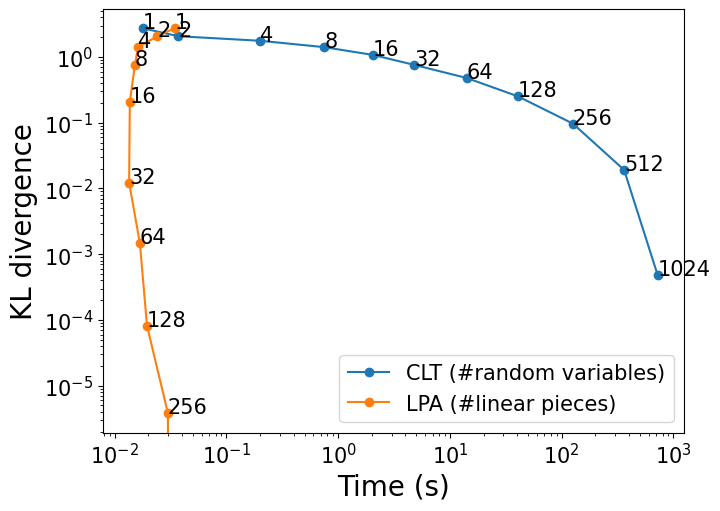

In [17]:
import matplotlib.pyplot as plt

filehandle = open("/space/poorvagarg/.julia/dev/Dice/scratch/clt_results.txt", "r")
lines = filehandle.readlines()

x = []
y = []
annot = []
for i in range(0,11):
    # i = 1
    cur = lines[i].split(",")
    x.append(float(cur[3]))
    y.append(float(cur[2]))
    annot.append(int(float(cur[0])))

plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=15)
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Time (s)")
ax.set_ylabel("KL divergence")
ax.plot(x, y, marker = "o")
for i in range(11):
     ax.annotate(annot[i], (x[i], y[i]))

filehandle = open("/space/poorvagarg/.julia/dev/Dice/scratch/lpa_results.txt", "r")
lines = filehandle.readlines()

x = []
y = []
annot = []
for i in range(0,10):
    # i = 1
    cur = lines[i].split(",")
    x.append(float(cur[2]))
    y.append(float(cur[1]))
    annot.append(int(float(cur[0])))

# fig, ax = plt.subplots()
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.plot(x, y, marker = "o")
for i in range(10):
     ax.annotate(annot[i], (x[i], y[i]))
ax.legend(["CLT (#random variables)", "LPA (#linear pieces)"])
fig.savefig("figure7.png", bbox_inches="tight")
# end
# annotate!(x[1], y[1], annot[1])

Figure8

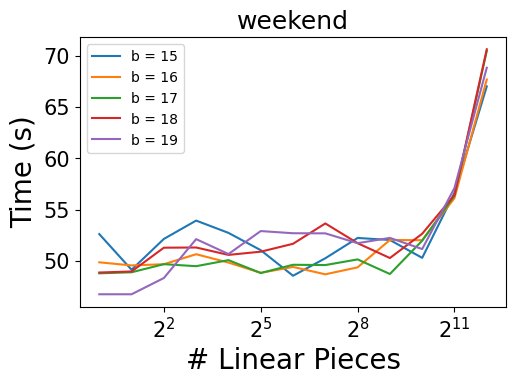

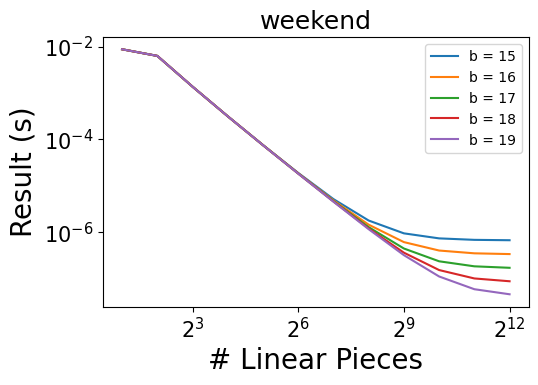

In [11]:
benchmark_name = "weekend"
bits = 20
pieces = 3
plt.rcParams["figure.figsize"] = [5.50, 3.50]
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=10)

def plot_fig8_time(benchmark_name, pieces):
    filehandle = open("/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark_name + "/results.txt")
    lines = filehandle.readlines()
    bits = int(float(lines[-1].split(",")[0]))
    fig, ax = plt.subplots()
    ax.set_xscale("log", base=2)
    # ax.set_yscale("log")
    ax.set_xlabel("# Linear Pieces")
    ax.set_ylabel("Time (s)")
    ax.set_title(benchmark_name)
    legend_list = []
    for i in range(15, 20):
        cur = []
        for j in lines:
            if int(float(j.split(",")[0])) == i:
                cur.append(j)
        
        x = []
        y = []
        for j in cur:
            cur_split = j.split(",")
            x.append(int(float(cur_split[1])))
            y.append((float(cur_split[-1])))
        ax.plot(x, y)
        legend_list.append("b = " + str(i))
    ax.legend(legend_list, loc="upper left")
    fig.savefig(benchmark_name + " time.svg", dpi=300, bbox_inches="tight")

def plot_fig8_result(benchmark_name, pieces):
    filehandle = open("/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark_name + "/results.txt")
    lines = filehandle.readlines()
    bits = int(float(lines[-1].split(",")[0]))
    fig, ax = plt.subplots()
    ax.set_xscale("log", base=2)
    ax.set_yscale("log")
    ax.set_xlabel("# Linear Pieces")
    ax.set_ylabel("Result (s)")
    ax.set_title(benchmark_name)
    legend_list = []
    for i in range(15, 20):
        cur = []
        for j in lines:
            if int(float(j.split(",")[0])) == i:
                cur.append(j)
        
        x = []
        y = []
        for j in cur:
            cur_split = j.split(",")
            x.append(int(float(cur_split[1])))
            y.append(abs((float(cur_split[-2]))- gt[benchmark_name]))
        ax.plot(x[1:], y[1:])
        legend_list.append("b = " + str(i))
    ax.legend(legend_list, loc="upper right")
    fig.savefig(benchmark_name + " result.svg", dpi=300, bbox_inches="tight")

plot_fig8_time(benchmark_name, pieces)
plot_fig8_result(benchmark_name, pieces)


Figure9

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [3.86, 4.604, 5.552, 7.586, 11.818, 20.588, 41.343, 82.035, 165.45, 409.807, 1038.0, 2578.0, 5569.0, 13620.0, 26190.0, 56724.0, 123424.0, 249921.0, 507784.0, 1069056.0] [3.584, 3.779, 4.022, 4.179, 4.484, 4.634, 4.781, 5.222, 5.48, 5.647, 5.966, 6.18, 6.523, 6.851, 6.98, 7.436, 7.658, 8.008, 8.14, 8.824]


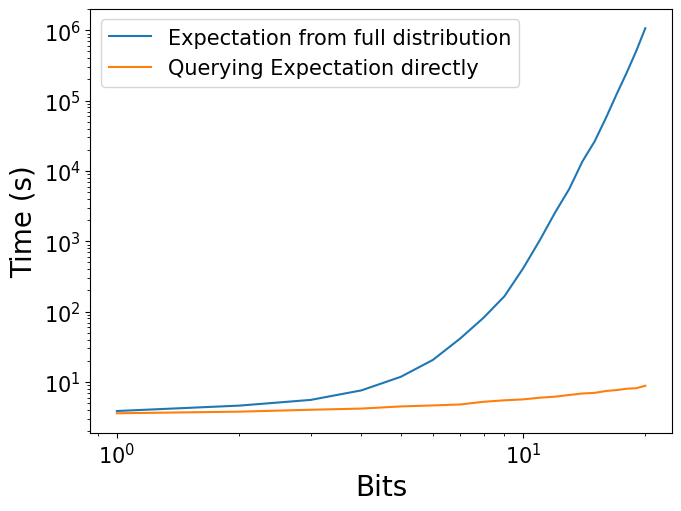

In [2]:
filehandle = open("/space/poorvagarg/.julia/dev/Dice/scratch/gaussian_exp_results.txt")
lines = filehandle.readlines()

x = []
y1 = []
y2 = []
for i in lines[1:]:
    cur = i.split(",")
    x.append(int(float(cur[0])))

    t1 = (cur[1][6:len(cur[1])-1])
    if t1[-2] == "m":
        y1.append(float(t1[:-3]))
    else:
        y1.append(float(t1[:-2])*1000)

    t2 = (cur[2][6:len(cur[2])-1])
    ms = t2.split(" ")[1][0] == "m"
    t2 = t2.split(" ")[0]    
    if ms:
        y2.append(float(t2))
    else:
        # print(t2[:-4])
        y2.append(float(t2)*1000)

print(x, y1, y2)

fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Bits")
ax.set_ylabel("Time (s)")
# ax.set_title("Speedup for expectation")
legend_list = ["Expectation from full distribution", "Querying Expectation directly"]
ax.plot(x, y1)
ax.plot(x, y2)
legend_list.append("b = " + str(i))
ax.legend(legend_list, loc="upper left")
fig.savefig("exp_resuts.png", dpi=300, bbox_inches="tight")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] [3.943, 4.385, 5.523, 7.625, 11.533, 19.873, 38.791, 80.247, 167.72, 402.323, 930.788, 2090.0, 4905.0, 13300.0, 29480.0, 57512.0, 118304.0, 259892.0, 555232.0, 1275307.0] [3.549, 4.027, 4.28, 4.883, 5.202, 5.766, 6.432, 7.097, 7.847, 8.838, 10.008, 10.411, 11.736, 12.814, 14.887, 15.919, 17.998, 19.526, 21.159, 24.096]


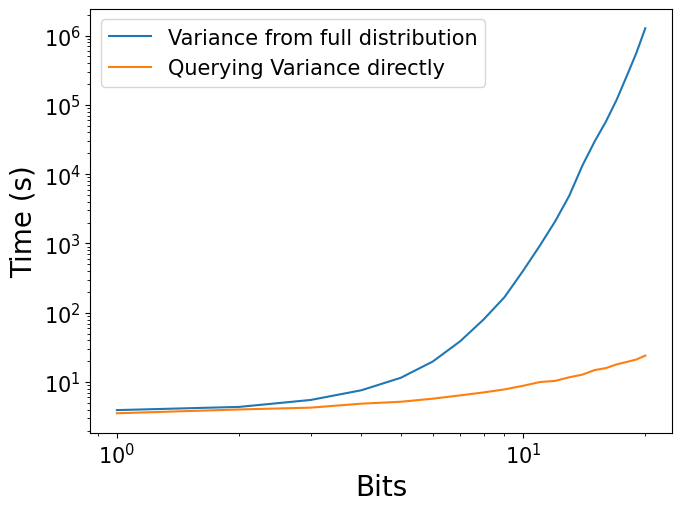

In [3]:
filehandle = open("/space/poorvagarg/.julia/dev/Dice/scratch/gaussian_var_results.txt")
lines = filehandle.readlines()

x = []
y1 = []
y2 = []
for i in lines[1:]:
    cur = i.split(",")
    x.append(int(float(cur[0])))

    t1 = (cur[1][6:len(cur[1])-1])
    if t1[-2] == "m":
        y1.append(float(t1[:-3]))
    else:
        y1.append(float(t1[:-2])*1000)

    t2 = (cur[2][6:len(cur[2])-1])
    ms = t2.split(" ")[1][0] == "m"
    t2 = t2.split(" ")[0]    
    if ms:
        y2.append(float(t2))
    else:
        # print(t2[:-4])
        y2.append(float(t2)*1000)

print(x, y1, y2)

fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Bits")
ax.set_ylabel("Time (s)")
# ax.set_title("Speedup for expectation")
legend_list = ["Variance from full distribution", "Querying Variance directly"]
ax.plot(x, y1)
ax.plot(x, y2)
legend_list.append("b = " + str(i))
ax.legend(legend_list, loc="upper left")
fig.savefig("var_resuts.png", dpi=300, bbox_inches="tight")

Spike and Slab

In [16]:
benchmark = "spike_and_slab"
gt[benchmark] = 0.0
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
# dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 40)
webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 40)
aqua_res, dice_res, webppl_rej_res, webppl_mcmc_res

IndexError: list index out of range

Kalman Filter

In [13]:
benchmark = "kalman_filter"
gt[benchmark] = 0.0
# aqua_res = AQUA_accuracy(benchmark, "/space/poorvagarg/PLDI2023/AQUA/benchmarks/new/" + benchmark + "/results.txt", gt[benchmark])
aqua_res = "not supported"
# dice_res = Dice_accuracy(benchmark, "/space/poorvagarg/.julia/dev/Dice/benchmarks/" + benchmark + "/results.txt", gt[benchmark], 1, None)
# webppl_rej_res = WebPPL_accuracy(benchmark, "rejection", gt[benchmark], 15)
# webppl_mcmc_res = WebPPL_accuracy(benchmark, "MCMC", gt[benchmark], 15)
webppl_smc_res = WebPPL_accuracy(benchmark, "SMC", gt[benchmark], 40)
aqua_res, webppl_smc_res

6.19320529588475 1.769594280211447
6.7652537489080995 1.7335318968533602
5.938554264326578 2.6830195225537645
6.408096517517377 2.162136863127377
6.855168671709163 1.1426214709703126
5.74291968181029 1.60923585015008
5.854525514956142 1.8826996990245322
5.490660619216021 1.4439637555717681
5.169204331998339 0.713198247138812
5.24569092085237 0.9748421241636175
3.9825648334728676 1.0023757645424933
3.6954986630047264 0.6908211521880956
3.6370540709906254 0.6042715188565944
3.432584597238853 0.7808585104146218
3.6107298475232708 0.4651457156278068
3.5479905469503232 0.333556034302815
40


('not supported', 3.432584597238853)